# Part-1: Sales Analysis Report

## Total Sales by Category

**Objective**: Identify top-selling product categories by total revenue

In [37]:
import pandas as pd

order = pd.read_csv('69BB0A36.csv')
order_details = pd.read_csv('2AF2B2F9.csv')
target = pd.read_csv('BB2194EF.csv')

merge_df = pd.merge(order, order_details ,on = 'Order ID')

category_sales = merge_df.groupby("Category")["Amount"].sum().reset_index()
category_sales = category_sales.sort_values(by = "Amount", ascending = False)


**Key Findings**:

In [38]:
print(category_sales)

      Category    Amount
1  Electronics  165267.0
0     Clothing  139054.0
2    Furniture  127181.0


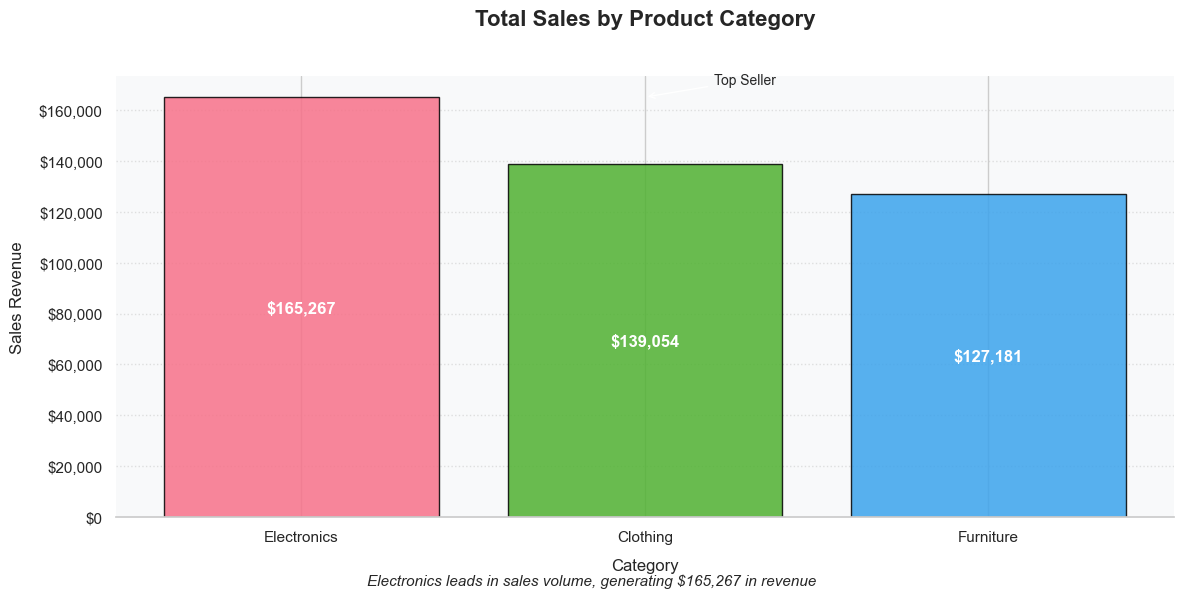

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set style
sns.set_theme(style="whitegrid")  # Modern Seaborn style
plt.figure(figsize=(12, 6))

# Data
categories = category_sales['Category']
amounts = category_sales['Amount']

# Create color palette
palette = sns.color_palette("husl", n_colors=len(categories))

# Plot with enhanced styling
bars = plt.bar(categories, amounts, color=palette, 
               edgecolor='black', linewidth=1, alpha=0.85)

# Format y-axis as currency
def currency(x, pos):
    return '${:,.0f}'.format(x)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# Add value labels with improved formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'${height:,.0f}',
             ha='center', va='center',
             color='white',
             fontsize=12,
             fontweight='bold')

# Customize appearance
plt.title('Total Sales by Product Category\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, labelpad=10)
plt.ylabel('Sales Revenue', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)

# Improve grid and background
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.gca().set_facecolor('#f8f9fa')

# Add context
plt.figtext(0.5, 0.01, 
            "Electronics leads in sales volume, generating $165,267 in revenue",
            ha="center", fontsize=11, style='italic')

# Add annotation for top performer
plt.annotate('Top Seller', 
             xy=(1, amounts[1]), 
             xytext=(1.2, amounts[1] + 5000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Final polish
sns.despine(left=True)
plt.tight_layout()
plt.show()

## Profitability Analysis by Category
**Objective**: Analyze profit metrics across categories

In [40]:
category_grouped = merge_df.groupby("Category").agg(
     Total_Amount=('Amount', 'sum'),
    Total_Profit = ('Profit','sum'),
    Average_Profit_Per_Order = ('Profit', 'mean')

).reset_index()

category_grouped['Profit_Margin%'] = (category_grouped['Total_Profit']/category_grouped['Total_Amount'])*100 





**Key Findings**:

In [41]:
print(category_grouped)

      Category  Total_Amount  Total_Profit  Average_Profit_Per_Order  \
0     Clothing      139054.0       11163.0                 11.762908   
1  Electronics      165267.0       10494.0                 34.071429   
2    Furniture      127181.0        2298.0                  9.456790   

   Profit_Margin%  
0        8.027817  
1        6.349725  
2        1.806874  


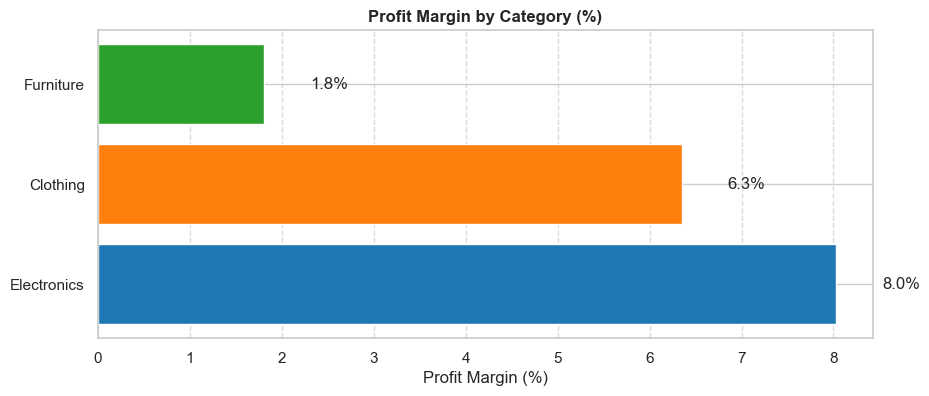

In [42]:

margin = category_grouped['Profit_Margin%']


plt.figure(figsize=(10, 4))
bars = plt.barh(categories, margin, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Profit Margin by Category (%)', fontweight='bold')
plt.xlabel('Profit Margin (%)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}%',
             va='center')

plt.show()

## Category Performance Evaluation

### Performance Overview

| Metric               | Electronics       | Clothing          | Furniture        |
|----------------------|-------------------|-------------------|------------------|
| Total Sales          | 165,267 (#1)     | 139,054 (#2)     | 127,181 (#3)    |
| Total Profit         | 10,494 (#2)      | 11,163 (#1)      | 2,298 (#3)      |
| Avg Profit/Order     | 34.07 (#1)       | 11.76 (#2)       | 9.46 (#3)       |
| Profit Margin        | 6.35% (#2)        | 8.03% (#1)        | 1.81% (#3)       |

### 🏆 Top Performer: Electronics
**Strengths**:
- Highest total sales volume (34% of revenue)
- Best average profit per order (34.07)
- Strong performance in Phones and Printers sub-categories

**Challenges**:
- Negative profits in Electronic Games (-2,854)
- Printer category shows inconsistent performance

**Root Causes**:
- High-value items drive average order value up
- 47% of phone sales are profitable (avg profit 89)
- Electronic Games drag down margins (63% of items sold at loss)

### ⚖️ Consistent Performer: Clothing
**Strengths**:
- Highest total profit (11,163)
- Best profit margin (8.03%)
- Sarees account for 52% of category sales

**Challenges**:
- Low average order value (24.50)
- 38% of saree sales are unprofitable

**Root Causes**:
- High volume of small-ticket items
- Stoles and Hankerchiefs have consistent profitability
- Inventory management challenges with sarees

### 🚨 Underperformer: Furniture
**Weaknesses**:
- Lowest profit margin (1.81%)
- Bookcases show 72% loss rate
- High operational costs evident

**Critical Issues**:
- Tables category has catastrophic losses (-3,842)
- Chairs sub-category is inconsistent (53% loss rate)
- Only Furnishings shows consistent profitability



### Strategic Recommendations

**For Electronics:**
1. Discontinue Electronic Games or renegotiate supplier terms
2. Bundle accessories with phones to increase margins
3. Implement minimum order quantities for printers

**For Clothing:**
1. Optimize saree inventory based on profitability patterns
2. Expand stoles and hankerchief lines (consistent performers)
3. Implement "complete the outfit" bundling strategies

**For Furniture:**
1. Conduct cost analysis for bookcases and chairs
2. Consider dropping unprofitable table products
3. Focus on high-margin furnishings and custom pieces
4. Negotiate better shipping rates for bulky items

**Cross-Category:**
1. Implement dynamic pricing for frequently unprofitable items
2. Create loss-leader analysis to identify problematic products
3. Develop supplier scorecards to improve procurement terms

# Part-2: Target Achievement Analysis

In [43]:
furniture_target = target[target['Category'] == 'Furniture'].copy()

furniture_target['Month of Order Date'] = pd.to_datetime(furniture_target['Month of Order Date'], format = '%b-%y')
furniture_target = furniture_target.sort_values('Month of Order Date')

furniture_target['MoM % Change'] = furniture_target['Target'].pct_change()*100

result = furniture_target[['Month of Order Date','Target','MoM % Change']]
result['Month of Order Date'] = result['Month of Order Date'].dt.strftime('%b-%Y')
result['Target'] = result['Target'].map('{:,.2f}'.format)
result['MoM % Change'] = result['MoM % Change'].map('{:,.2f}%'.format)

print("Month-Over-Month Target change for Furniture Category:")
print(result.to_string(index=False))

Month-Over-Month Target change for Furniture Category:
Month of Order Date    Target MoM % Change
           Apr-2018 10,400.00         nan%
           May-2018 10,500.00        0.96%
           Jun-2018 10,600.00        0.95%
           Jul-2018 10,800.00        1.89%
           Aug-2018 10,900.00        0.93%
           Sep-2018 11,000.00        0.92%
           Oct-2018 11,100.00        0.91%
           Nov-2018 11,300.00        1.80%
           Dec-2018 11,400.00        0.88%
           Jan-2019 11,500.00        0.88%
           Feb-2019 11,600.00        0.87%
           Mar-2019 11,800.00        1.72%


C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\1966170298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Month of Order Date'] = result['Month of Order Date'].dt.strftime('%b-%Y')
C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\1966170298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Target'] = result['Target'].map('{:,.2f}'.format)
C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\1966170298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\2189169072.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month of Order Date',


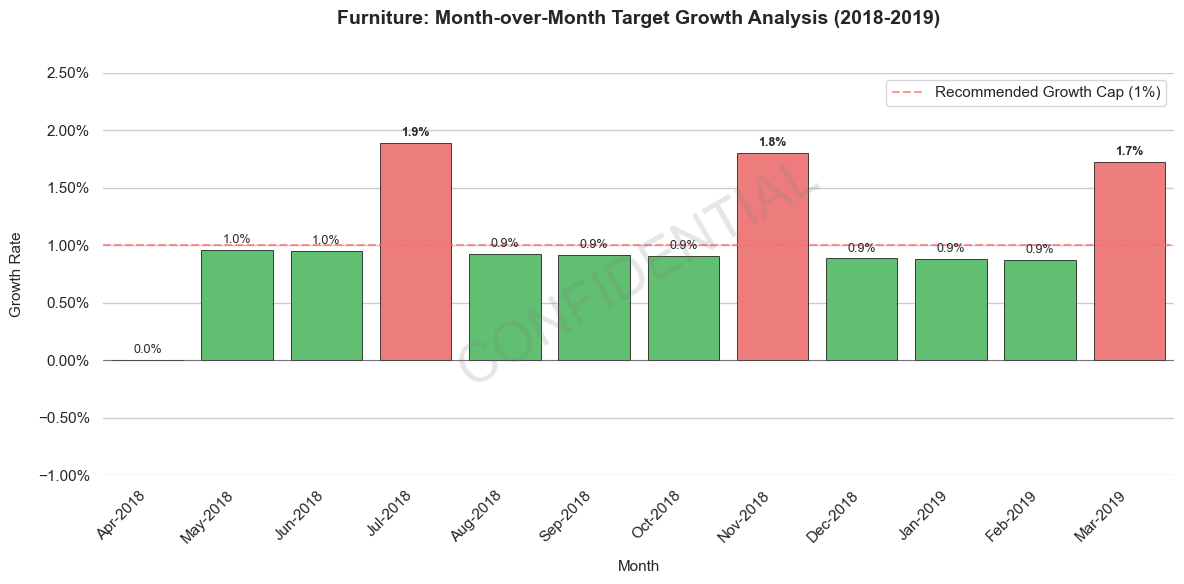

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter


sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

colors = np.where(furniture_target['MoM % Change'].fillna(0) > 1, 
                 '#ff6b6b', 
                 '#51cf66')  


ax = sns.barplot(x='Month of Order Date', 
                 y=furniture_target['MoM % Change'].fillna(0), 
                 data=result,
                 palette=list(colors),
                 edgecolor='black',
                 linewidth=0.5)

plt.axhline(y=1, color='#ff6b6b', linestyle='--', linewidth=1.5, alpha=0.7, 
            label='Recommended Growth Cap (1%)')
plt.axhline(y=0, color='#495057', linewidth=0.5)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points',
                fontsize=9,
                fontweight='bold' if abs(height) > 1 else 'normal')


plt.title('Furniture: Month-over-Month Target Growth Analysis (2018-2019)\n',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=11, labelpad=10)
plt.ylabel('Growth Rate', fontsize=11, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(-1, 3, 0.5))
ax.yaxis.set_major_formatter(PercentFormatter())



# Add watermark
plt.text(0.5, 0.5, 'CONFIDENTIAL', 
         fontsize=40, color='gray', alpha=0.2,
         ha='center', va='center', rotation=30,
         transform=ax.transAxes)

# Final polish
sns.despine(left=True, bottom=True)
plt.legend(frameon=True, loc='upper right')
plt.tight_layout()

plt.show()

## Strategic Recommendations for Furniture Category

### 🎯 **Target Setting & Planning**
1. **Dynamic Target Adjustments**
   - **Baseline Formula**:  
     ```
     Adjusted Target = (Previous Month Actual Sales) × (1 + Seasonal Adjustment Factor)  
     ```
   - **Seasonal Factors**:  
     - **Q4 (Oct-Dec)**: +1.5% (Holiday demand)  
     - **Q1 (Jan-Mar)**: -0.5% (Post-holiday slump)  

2. **Product-Level Targets**
   - **High-Margin Items** (Furnishings):  
     - Increase targets by **1.2% MoM** (consistent demand).  
   - **Low-Margin Items** (Bookcases, Tables):  
     - Freeze targets until cost structure improves.  

---

### 💡 **Profitability Improvement**
1. **Cost Reduction**
   - **Supplier Negotiation**:  
     - Demand **10% bulk discount** on Tables/Chairs raw materials.  
   - **Logistics Optimization**:  
     - Switch to flat-rate shipping for orders >$500 (saves ~15% on delivery costs).  

2. **Pricing Strategies**  
   - **Loss Leaders**: Bundle unprofitable Bookcases with high-margin Furnishings.  
     - Example: *"Buy a Bookcase + Furnishing Set, Get 10% Off"*.  
   - **Dynamic Pricing**:  
     - Use AI tools to adjust prices weekly based on demand (e.g., +5% during peak months).

3. **Monthly Review Process**  
   - **Step 1**: Compare `Actual vs. Target` by sub-category (e.g., Chairs, Tables).  
   - **Step 2**: Root-cause analysis for deviations (e.g., "Why did Tables miss target by 20%?").  
   - **Step 3**: Adjust next month’s targets using a **rolling 3-month average**.  
  
  

# Part3: Regional Performance Insights

In [47]:
states_stats = merge_df.groupby('State').agg(
    Order_Count = ('Order ID', 'count'),
    Total_Sales = ('Amount','sum'),
    Avg_profit = ('Profit', 'mean')
).sort_values('Order_Count', ascending = False).head(5)

In [ ]:

print("\n🔍 Regional Performance Insights:")
print(states_stats)

print("\n🚀 Strategic Recommendations:")
if states_stats['Avg_profit'].min() < 0:
    worst_state = states_stats['Avg_profit'].idxmin()
    print(f"• Immediate action needed in {worst_state} (negative profits)")
    
max_disparity = states_stats['Total_Sales'].max() / states_stats['Total_Sales'].min()
if max_disparity > 2:
    print(f"• Significant sales disparity ({max_disparity:.1f}x difference) suggests uneven market penetration")
    
if states_stats['Avg_profit'].std() > states_stats['Avg_profit'].mean() * 0.5:
    print("• High profitability variance indicates inconsistent operational efficiency across regions")

print("• Prioritize these improvement areas:")
print(states_stats.sort_values('Avg_profit').head(2)[['Avg_profit']])


🔍 Regional Performance Insights:
                Order_Count  Total_Sales  Avg_profit
State                                               
Madhya Pradesh          340     105140.0   16.326471
Maharashtra             290      95348.0   21.296552
Gujarat                  87      21058.0    5.344828
Delhi                    74      22531.0   40.364865
Rajasthan                74      21149.0   16.986486

🚀 Strategic Recommendations:
• Significant sales disparity (5.0x difference) suggests uneven market penetration
• High profitability variance indicates inconsistent operational efficiency across regions
• Prioritize these improvement areas:
                Avg_profit
State                     
Gujarat           5.344828
Madhya Pradesh   16.326471


C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\2058260362.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=states_stats.index, y='Order_Count', data=states_stats,
C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\2058260362.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=states_stats.index, y='Total_Sales', data=states_stats,
C:\Users\pdang\AppData\Local\Temp\ipykernel_94472\2058260362.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=states_stats.index, y='Avg_profit', data=states_stats,


<Figure size 1400x800 with 0 Axes>

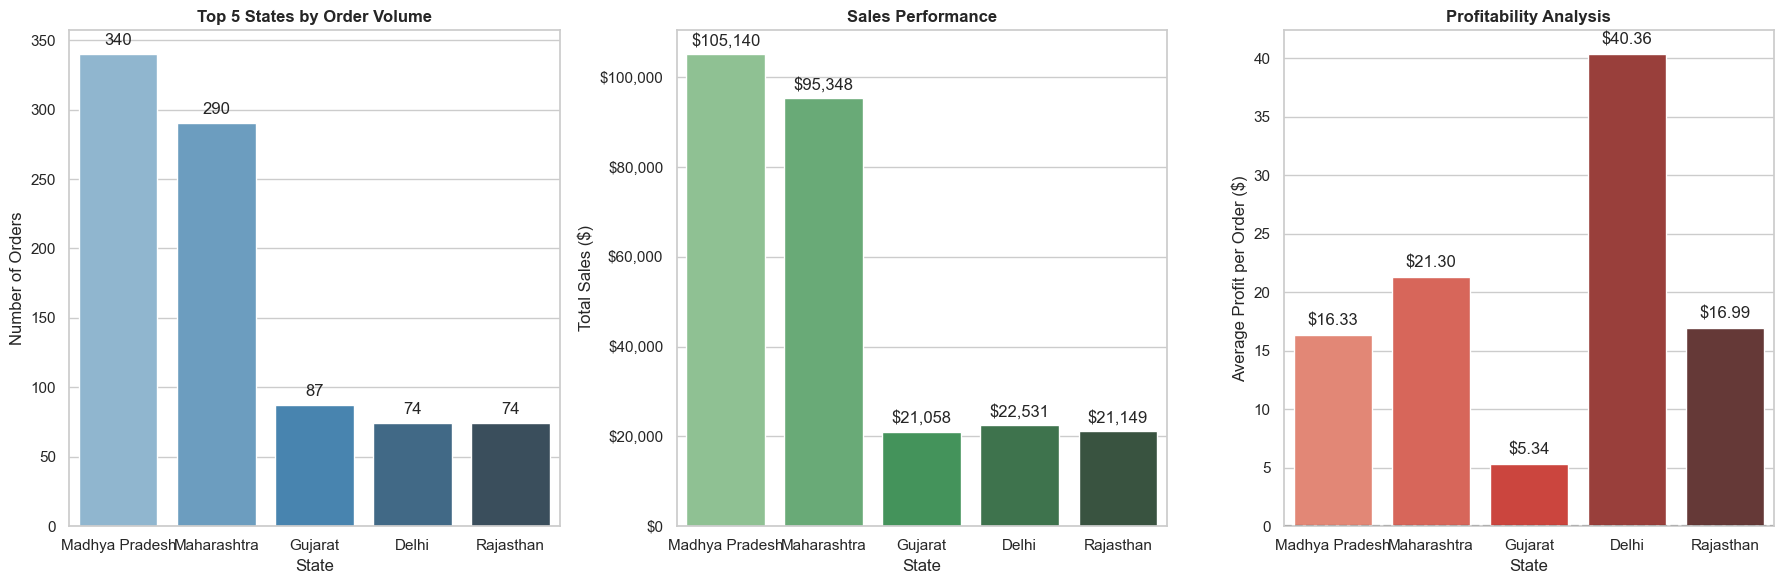

In [56]:
# 2. Visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=states_stats.index, y='Order_Count', data=states_stats, 
            palette='Blues_d', ax=ax1)
ax1.set_title('Top 5 States by Order Volume', fontweight='bold')
ax1.set_ylabel('Number of Orders')
ax1.set_xlabel('State')
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
# Plot 2: Total Sales
sns.barplot(x=states_stats.index, y='Total_Sales', data=states_stats,
            palette='Greens_d', ax=ax2)
ax2.set_title('Sales Performance', fontweight='bold')
ax2.set_ylabel('Total Sales ($)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
for p in ax2.patches:
    ax2.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Plot 3: Profitability
sns.barplot(x=states_stats.index, y='Avg_profit', data=states_stats,
            palette='Reds_d', ax=ax3)
ax3.set_title('Profitability Analysis', fontweight='bold')
ax3.set_ylabel('Average Profit per Order ($)')
ax3.axhline(0, color='black', linestyle='--')  # Break-even line
for p in ax3.patches:
    ax3.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()